In [149]:
import pandas as pd
import numpy as ny
import seaborn as sns 
%pylab inline
import matplotlib.pyplot as plt
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [150]:
titanic = pd.read_csv('titanic-data.csv')

In [281]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [152]:
passengers = titanic['PassengerId'].unique()
num_passengers = len(passengers)
num_survived = titanic['Survived'].sum()

# Discuss the factors that affect the survived rate

- passengers classes
- cabins
- sex
- age
- embarked places

Text(0.5,1,u'Correlation of survived rate and passengers class')

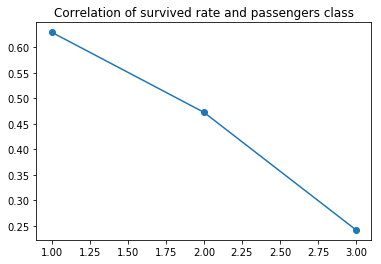

In [277]:
################################
#  1.correlation bertween survived rate and Pclass
################################

num_passengers_by_pclass = titanic.groupby('Pclass').count()['PassengerId']
num_surived_by_pclass = titanic.groupby('Pclass').sum()['Survived']
survived_rate_pclass = num_surived_by_pclass / num_passengers_by_pclass
plt.plot(survived_rate_pclass,marker='o')
# survived_rate_pclass.plot()
plt.title('Correlation of survived rate and passengers class')


In [298]:
################################
#  2.correlation bertween survived rate,Pclass,Cabin
################################
num_cabins_by_pcalss = titanic.groupby('Pclass').Cabin.nunique()

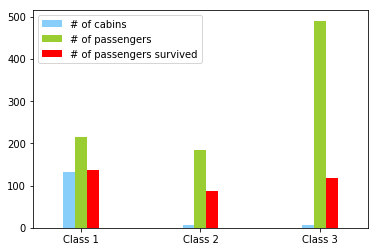

In [323]:
data_by_pclass = pd.DataFrame({'# of cabins':num_cabins_by_pcalss.values,
                               '# of passengers':num_passengers_by_pclass.values,
                               '# of passengers survived':num_surived_by_pclass.values},
                             index = ['Class 1','Class 2','Class 3'])
data_by_pclass.plot.bar(color = ['lightskyblue','yellowgreen','red'],width = 0.3,rot = 0)

In [300]:
################################
#  2.1.correlation bertween survived rate and cabins
################################
num_passengers_by_cabin = titanic.groupby('Cabin').sum()
num_survived_by_cabin = num_passengers_by_cabin['Survived'].sum()
num_survived_not_by_cabin = num_survived - num_survived_by_cabin
num_passengers_in_cabin = titanic['Cabin'].count()
num_passengers_not_in_cabin = num_passengers - num_passengers_in_cabin
print 'num_passengers:',num_passengers
print 'num_passengers_in_cabin:',num_passengers_in_cabin
print 'num_passengers_not_in_cabin:',num_passengers_not_in_cabin
print 'num_survived_by_cabin:',num_survived_by_cabin
print 'num_survived_not_by_cabin:',num_survived_not_by_cabin

num_passengers: 891
num_passengers_in_cabin: 204
num_passengers_not_in_cabin: 687
num_survived_by_cabin: 136
num_survived_not_by_cabin: 206


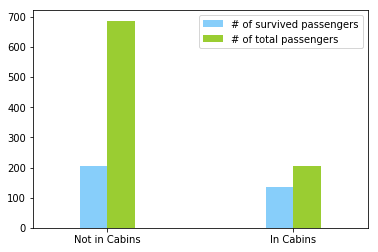

In [311]:
data_by_cabin = pd.DataFrame({'# of total passengers': [num_passengers_not_in_cabin,num_passengers_in_cabin],
                              '# of survived passengers': [num_survived_not_by_cabin,num_survived_by_cabin]},
                              index = ['Not in Cabins','In Cabins']
                              )
data_by_cabin.plot.bar(color = ['lightskyblue','yellowgreen'],width = 0.3,rot = 0)

In [313]:
################################
#  3.correlation between sex and survived rate
################################

data_by_sex = titanic.groupby('Sex',as_index = False).count()
num_passengers_by_sex = data_by_sex['PassengerId']
num_passengers_survived_by_sex = titanic.groupby('Sex',as_index = False).sum()['Survived']

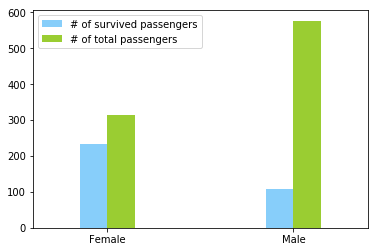

In [314]:
data_by_sex = pd.DataFrame({'# of total passengers': num_passengers_by_sex.values,
                              '# of survived passengers': num_passengers_survived_by_sex.values},
                              index = ['Female','Male']
                              )
data_by_sex.plot.bar(color = ['lightskyblue','yellowgreen'],width = 0.3,rot = 0)

In [241]:
################################
#  4.correlation between age and survived rate
################################

data_by_survived = titanic.groupby('Survived').mean()
data_by_survived

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


In [318]:
################################
#  5.correlation between Embarked and survived rate
################################
num_by_embarked = titanic.groupby('Embarked').count()['Survived']
num_survived_by_embarked = titanic.groupby('Embarked').sum()['Survived']

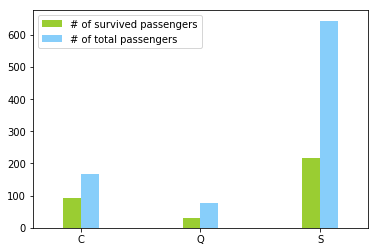

In [319]:
data_by_embarked = pd.DataFrame({'# of total passengers':num_by_embarked.values,
                               '# of survived passengers':num_survived_by_embarked.values},
                             index = ['C','Q','S'])
data_by_embarked.plot.bar(color = ['yellowgreen','lightskyblue'],width = 0.3,rot = 0)

Text(0.5,1,u'Survived rate of different place')

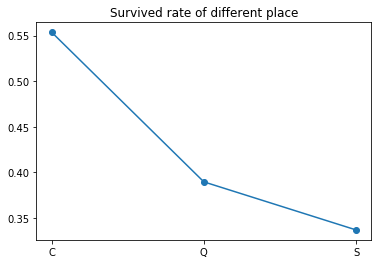

In [320]:
plt.plot(num_survived_by_embarked/num_by_embarked,marker='o')
plt.title('Survived rate of different place')

In [326]:
################################
#  5.1 Since passengers from Southampton have a lower survived rate, the next step is digging into it 
#      and finding possible reason
################################

# Check if it's related to pclass
num_by_embarked_pclass = titanic.groupby(['Embarked','Pclass'],as_index = False).count()
num_survived_by_embarked_pclass = titanic.groupby(['Embarked','Pclass'],as_index = False).sum()
survived_rate = num_survived_by_embarked_pclass['Survived'] / num_by_embarked_pclass['Survived']

c_rate = [survived_rate.iloc[0],survived_rate.iloc[3],survived_rate.iloc[6]]
q_rate = [survived_rate.iloc[1],survived_rate.iloc[4],survived_rate.iloc[7]]
s_rate = [survived_rate.iloc[2],survived_rate.iloc[5],survived_rate.iloc[8]]


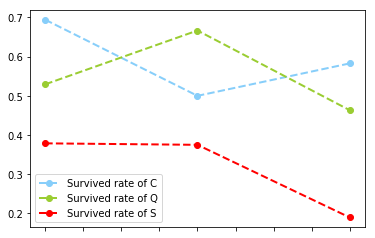

In [327]:
data_by_pclass_embarked = pd.DataFrame({'Survived rate of C':c_rate,
                               'Survived rate of Q':q_rate,
                               'Survived rate of S':s_rate},
                             index = ['Class 1','Class 2','Class 3'])
data_by_pclass_embarked.plot(color = ['lightskyblue','yellowgreen','red'],linewidth=2,linestyle='dashed',marker='o')